# Göğüs Kanseri (Breast Cancer) Sınıflandırması

In [ ]:
# kütüphaneleri yükleyelim
import numpy as np
import seaborn as sns
import pandas as pd

In [ ]:
ROOT_DIR = "https://media.githubusercontent.com/media/yapay-ogrenme/casgem-eu-project-training-on-data-mining-2nd/main/PART1/Day1-Intro/notebooks"
DATASET_PATH = ROOT_DIR + "/datasets/"

In [ ]:
df = pd.read_csv(DATASET_PATH + 'breast_cancer_dataset.csv')

Öznitelik Bilgileri:

- id (kimlik numarası)
- diagnosis (tanı) (M = malignant (kötü huylu), B = benign (iyi huylu))


In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Dataframe'in boyutunu görüntüleyelim.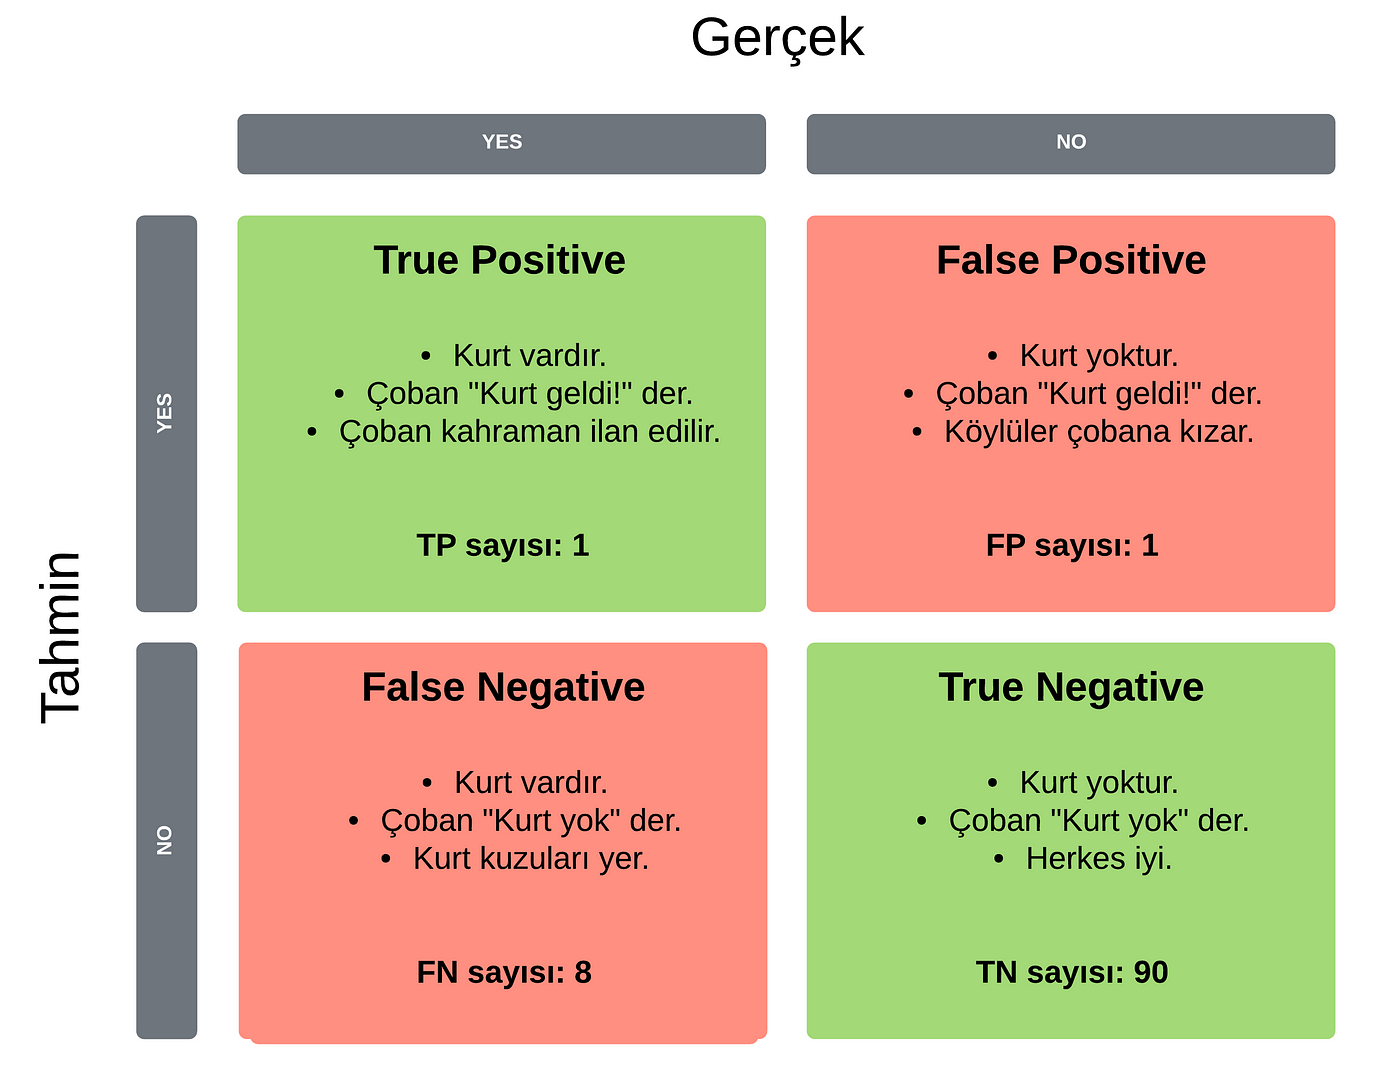

In [ ]:
df.shape

(569, 33)

DataFrame içerisindeki **"Unnamed: 32"** ve **"id"** kolonlarını dataframe'den kaldıralım.

In [ ]:
df.drop(['Unnamed: 32','id'], axis = 1, inplace=True)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Veri kümesini tahminlenmeye çalışılan değerlerini içeren kolonun adı **"diagnosis"** (teşhis,tanı) dir.
pandas dataframe'in `unique()` property'sini kullanarak farklı etiketin bulunduğunu keşfedelim.


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

pandas dataframe'in `value_counts()` property'sini kullanarak her sınıfa ait örnek sayısını bulalım.

In [ ]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

"diagnosis" kolonundaki M değerlerini 1 ile, B değerlerini ise 0 ile değiştirelim.


In [ ]:
df['diagnosis'].replace(
    {
        'M' : 1,
        'B' : 0
     }
    , inplace=True)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

model inputu olarak etiket değerlerini "y" dizisine, diğer öznitelikleri (features) de X matrisine tanımlayalım.

In [ ]:
y = df["diagnosis"]
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:

X = df.drop(["diagnosis"], axis=1)

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


X matrisinin boyutunun (569, 30) olduğunu görüntüleyerek teyit edelim.

In [ ]:
X.shape

(569, 30)

Tüm veri kümesinin %30'unu test kümesi, geri kalanını da eğitim kümesi olacak şekilde ayıralım.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
269,10.710,20.39,69.50,344.9,0.10820,0.12890,0.08448,0.02867,0.1668,0.06862,...,11.690,25.21,76.51,410.4,0.1335,0.2550,0.2534,0.08600,0.2605,0.08701
223,15.750,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,0.06303,...,19.560,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640
23,21.160,23.04,137.20,1404.0,0.09428,0.10220,0.10970,0.08632,0.1769,0.05278,...,29.170,35.59,188.00,2615.0,0.1401,0.2600,0.3155,0.20090,0.2822,0.07526
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,...,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.10840
189,12.300,15.90,78.83,463.7,0.08080,0.07253,0.03844,0.01654,0.1667,0.05474,...,13.350,19.59,86.65,546.7,0.1096,0.1650,0.1423,0.04815,0.2482,0.06306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,19.190,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,0.1741,0.05176,...,22.030,17.81,146.60,1495.0,0.1124,0.2016,0.2264,0.17770,0.2443,0.06251
14,13.730,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.030,32.01,108.80,697.7,0.1651,0.7725,0.6943,0.22080,0.3596,0.14310
207,17.010,20.26,109.70,904.3,0.08772,0.07304,0.06950,0.05390,0.2026,0.05223,...,19.800,25.05,130.00,1210.0,0.1111,0.1486,0.1932,0.10960,0.3275,0.06469
481,13.900,19.24,88.73,602.9,0.07991,0.05326,0.02995,0.02070,0.1579,0.05594,...,16.410,26.42,104.40,830.5,0.1064,0.1415,0.1673,0.08150,0.2356,0.07603


In [ ]:
y_train

269    0
223    1
23     1
71     0
189    0
      ..
161    1
14     1
207    1
481    0
322    0
Name: diagnosis, Length: 426, dtype: int64

## SVM

`sklearn` kütüphanesi altındaki **SVC** (SVM) sınıflandırma algoritmasını kullanarak sınıflandırma modelini eğitelim.

**kernel** hiperparametresini **linear** olarak tanımlayarak kullanalım.

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

SVC(kernel='linear')

Eğitmiş modeli, test kümesi üzerinde çalıştırarak tahminleri elde edin ve tahmin sonuçlarını görüntüleyelim.

In [ ]:
X_test.iloc[0]

radius_mean                 12.540000
texture_mean                18.070000
perimeter_mean              79.420000
area_mean                  491.900000
smoothness_mean              0.074360
compactness_mean             0.026500
concavity_mean               0.001194
concave points_mean          0.005449
symmetry_mean                0.152800
fractal_dimension_mean       0.051850
radius_se                    0.351100
texture_se                   0.952700
perimeter_se                 2.329000
area_se                     28.300000
smoothness_se                0.005783
compactness_se               0.004693
concavity_se                 0.000793
concave points_se            0.003617
symmetry_se                  0.020430
fractal_dimension_se         0.001058
radius_worst                13.720000
texture_worst               20.980000
perimeter_worst             86.820000
area_worst                 585.700000
smoothness_worst             0.092930
compactness_worst            0.043270
concavity_wo

In [ ]:
y_pred = svc.predict(X_test)
print(y_pred)

[0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0]


`sklearn.metrics` kütüphanesi altındaki `accuracy_score` fonksiyonundan yararlanarak başarım oranını hesaplatalım.

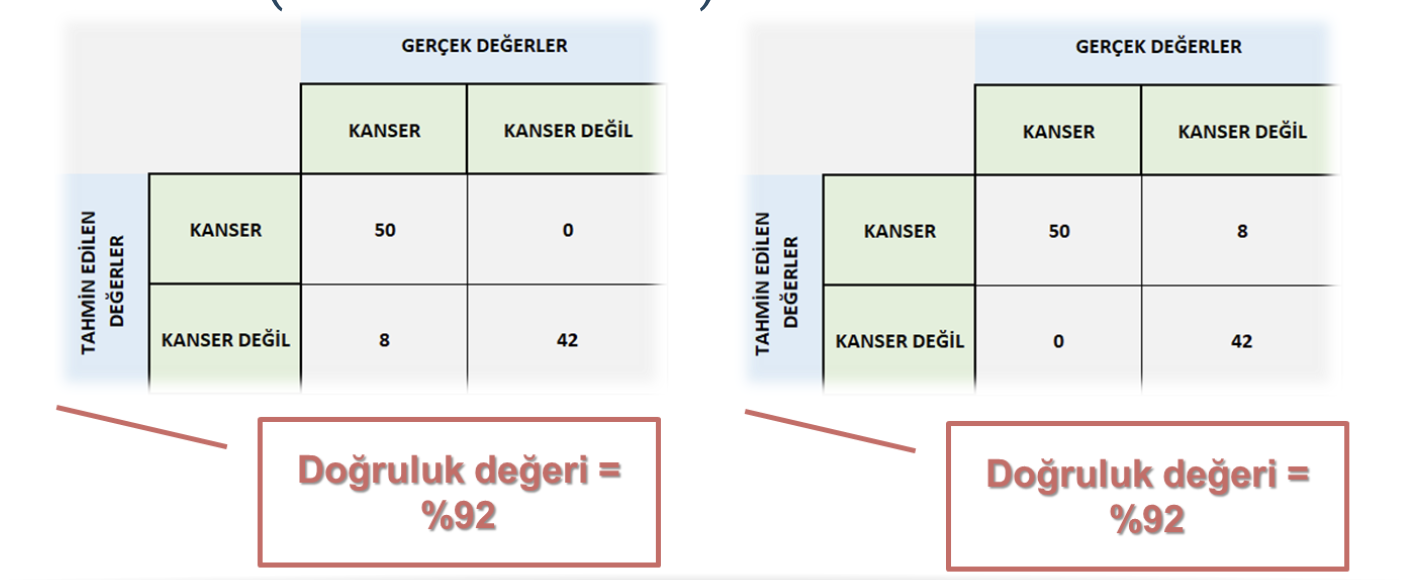

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score",accuracy_score(y_test, y_pred))

Accuracy Score 0.9790209790209791


test kümesinin etiketleri ile test kümesi üzerindeki model tahminlerini karşılaştıran confusion_matrix (karışıklık matrisi)ni oluşturalım.


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[89,  2],
       [ 1, 51]])

## KNeighborsClassifier

SVM'e benzer şekilde `KNeighborsClassifier` sınıflandırma modelini eğiterek ACC (Accuracy) ve CF (Confusion Matrix) değerlerini hesaplayalım.

KNeighborsClassifier modeli için n_neighbors hiperparametre değerini 5 olarak atayalım.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

## KNN Classifier with K=5 (Initial)
knn = KNeighborsClassifier(n_neighbors=3)

## Fit the model
knn.fit(X_train, y_train)

## Predict the values
pred = knn.predict(X_test)

In [ ]:
# Accuracy Score
from sklearn.metrics import accuracy_score

In [ ]:
print("Accuracy Score",accuracy_score(y_test, pred))

Accuracy Score 0.9440559440559441


In [ ]:
cm = confusion_matrix(y_test, pred)
cm

array([[85,  6],
       [ 2, 50]])